### Import Libraries

In [ ]:

import numpy as np
import pandas as pd

### Load Dataset

In [ ]:
###Load data here###
data = pd.read_csv('data.csv')
print(data.shape)
# Remove rows with zeros in the specified columns
cols = ['Bedrooms', 'Area', 'Price']
data = data[(data[cols] != 0).all(axis=1)]
data.shape


(1000, 3)


(893, 3)

### Visualize Data

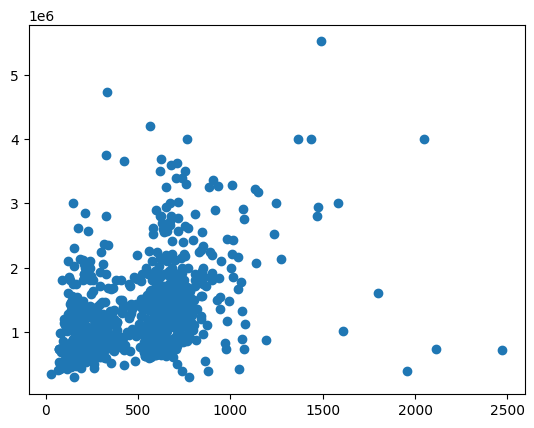

In [64]:
##Run this cell to visualize the data###
import matplotlib.pyplot as plt

plt.scatter(x=data.Area.values, y=data.Price.values)
plt.show()

### Check for Missing Values

In [65]:
###Check for Missing Data###
data.isna().sum()

Bedrooms    0
Area        0
Price       0
dtype: int64

### Perform Minmax Scaling

In [66]:
def minmax_scaling (data, column):
    min = data[column].min()
    max = data[column].max()
    return (data[column] - min) / (max - min)

In [67]:
###Apply above function on appropriate columns###
data['S_area'] = minmax_scaling(data, 'Area')
data['S_price'] = minmax_scaling(data, 'Price')
data.head(5)

,Bedrooms,Area,Price,S_area,S_price
0,2,202.0,1480000.0,0.070844,0.227611
1,2,156.0,1035000.0,0.052007,0.142639
2,3,134.0,1465000.0,0.042998,0.224747
3,3,94.0,850000.0,0.026618,0.107313
4,4,120.0,1600000.0,0.037265,0.250525


### Divide Data into Training and Testing

In [68]:
def train_test_split (data, ratio):
    indices = np.random.permutation(data.shape[0])
    test_set_size = int(data.shape[0] * ratio)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [69]:
###Understand the above function and divide data into X_train, X_test, y_train, y_test###
train_data, test_data = train_test_split(data, 0.2)
print(train_data.shape)
print(test_data.shape)
# Extracting the features for training and testing
x_train = train_data[['Bedrooms','S_area']]
print(x_train.shape)
x_test = test_data[['Bedrooms','S_area']]
print(x_test.shape)
# Extracting the target variable for training and testing
y_train = train_data['S_price']
print(y_train.shape)
y_test = test_data['S_price']
print(y_test.shape)

(715, 5)
(178, 5)
(715, 2)
(178, 2)
(715,)
(178,)


### Calculate Weights Using the Normal Equation Method (Matrix Algebra)

In [70]:
###Use the np.linalg.inv function to compute the weight vector/array theta (Hint: @ operator in numpy)###
###You will be required to extract numpy arrays from the DataFrame (Hint: column_name.values)###
###Also, you need to reshape the arrays and merge them to create a multi-dimensional
###array in numpy, similar to a Pandas DataFrame (Hint: np.hstack)
###A bias vector/column is also required as a column in our stacked array (Hint: np.ones)###
# Stacking the features horizontally
x_train = x_train.values
print(x_train.shape)
# Adding a bias column of ones to the feature set
x_train = np.hstack((x_train, np.ones((x_train.shape[0], 1))))
print(x_train.shape)
y_train = y_train.values.reshape(y_train.shape[0], 1)
print(y_train.shape)
theta = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train
print(theta)
print(theta.shape)
x_train

(715, 2)
(715, 3)
(715, 1)
[[ 0.06027461]
 [ 0.25067558]
 [-0.04672107]]
(3, 1)


array([[3.        , 0.1048321 , 1.        ],
       [3.        , 0.09377559, 1.        ],
       [5.        , 0.35094185, 1.        ],
       ...,
       [3.        , 0.04832105, 1.        ],
       [3.        , 0.23054873, 1.        ],
       [4.        , 0.13636364, 1.        ]], shape=(715, 3))

### Calculate Predictions on Test Set

In [71]:
###Calculate predictions on X_test using theta###

x_test = x_test.values
print(x_test.shape)
# Adding a bias column of ones to the test set
x_test = np.hstack((x_test, np.ones((x_test.shape[0], 1))))
print(x_test.shape)
# Calculate predictions
y_pred = x_test @ theta
print(y_pred)

(178, 2)
(178, 3)
[[0.32917714]
 [0.25268356]
 [0.52248842]
 [0.2525809 ]
 [0.21921908]
 [0.15596758]
 [0.22722592]
 [0.08635166]
 [0.1633585 ]
 [0.15258007]
 [0.17259716]
 [0.1544278 ]
 [0.27382982]
 [0.25278621]
 [0.2551472 ]
 [0.19004796]
 [0.10852444]
 [0.25699493]
 [0.26284608]
 [0.32353129]
 [0.16294789]
 [0.17403428]
 [0.15021908]
 [0.20359799]
 [0.20626693]
 [0.26695215]
 [0.19682297]
 [0.0888153 ]
 [0.08522249]
 [0.15678879]
 [0.16151077]
 [0.09394789]
 [0.19117713]
 [0.18111725]
 [0.25309416]
 [0.21745597]
 [0.16479563]
 [0.31757749]
 [0.18912409]
 [0.15771266]
 [0.31059717]
 [0.16161342]
 [0.08748083]
 [0.22732857]
 [0.26777336]
 [0.14344406]
 [0.26602828]
 [0.19600176]
 [0.240468  ]
 [0.20452185]
 [0.08316945]
 [0.25412068]
 [0.18758431]
 [0.15288802]
 [0.25124643]
 [0.25884266]
 [0.24806423]
 [0.20267412]
 [0.15781531]
 [0.25494189]
 [0.19107447]
 [0.26869723]
 [0.36849276]
 [0.1954885 ]
 [0.19323016]
 [0.17875626]
 [0.17814035]
 [0.17126269]
 [0.13213434]
 [0.16089486]
 [

### Calculate MSE (Evaluate Model)

In [72]:
###Evaluate the regression model based on Mean Squared Error###
# Calculate Mean Squared Error
y_test = y_test.values
y_test = y_test.reshape(y_test.shape[0], 1)

n = len(y_test)
MSE = (1 / (2 * n)) * np.sum(np.square(y_pred - y_test))
print("Mean Squared Error:", MSE)

Mean Squared Error: 0.0050459396596008515


### Inverse Transform Model's Output

In [73]:
###Transform model's output back to original range/scale###

def inverse_minmax_scaling(scaled_column, min, max):
    return  scaled_column * (max - min) + min

min = data['Price'].min()
max = data['Price'].max()
y_pred_rs = inverse_minmax_scaling(y_pred, min, max)
y_test_rs = inverse_minmax_scaling(y_test, min, max)

for i in range(len(y_test)):
    print("Predicted Price:", round(y_pred_rs[i][0],0), "Actual Price:", y_test_rs[i])

Predicted Price: 2011901.0 Actual Price: [3510000.]
Predicted Price: 1611304.0 Actual Price: [785000.]
Predicted Price: 3024272.0 Actual Price: [4000000.]
Predicted Price: 1610766.0 Actual Price: [2900000.]
Predicted Price: 1436050.0 Actual Price: [1155000.]
Predicted Price: 1104802.0 Actual Price: [890000.]
Predicted Price: 1477982.0 Actual Price: [1110000.]
Predicted Price: 740224.0 Actual Price: [636000.]
Predicted Price: 1143508.0 Actual Price: [995000.]
Predicted Price: 1087062.0 Actual Price: [780000.]
Predicted Price: 1191891.0 Actual Price: [1500000.]
Predicted Price: 1096738.0 Actual Price: [968000.]
Predicted Price: 1722047.0 Actual Price: [1100000.]
Predicted Price: 1611841.0 Actual Price: [1698888.]
Predicted Price: 1624206.0 Actual Price: [1500000.]
Predicted Price: 1283281.0 Actual Price: [965000.]
Predicted Price: 856342.0 Actual Price: [700000.]
Predicted Price: 1633882.0 Actual Price: [1150000.]
Predicted Price: 1664525.0 Actual Price: [1137500.]
Predicted Price: 19823

### Calcualte Weights Using Gradient Descent

In [ ]:
###Implement Batch GD to compute the weight vector theta###

theta0, theta1, theta2 =0, 0, 0
alpha = 0.0001
epochs = 100
n = x_train.shape[0]

for i in range(epochs):
    ###Implement GD###
     # Calculate the hypothesis
    h_X = theta0 * x_train[:, 0] + theta1 * x_train[:, 1] + theta2 * x_train[:, 2]
    
    # Calculate the gradients (dh/dtheta0, dh/dtheta1, dh/dtheta2)
    
    # dh/dtheta0 = (1/n) * sum(h_X - y_train) * x_j where j = 0
    dh_dtheta0 = (1/n) * np.sum((h_X - y_train) * x_train[:, 0])
    # dh/dtheta1 = (1/n) * sum(h_X - y_train) * x_j where j = 1
    dh_dtheta1 = (1/n) * np.sum((h_X - y_train) * x_train[:, 1])
    # dh/dtheta2 = (1/n) * sum(h_X - y_train) * x_j where j = 2
    dh_dtheta2 = (1/n) * np.sum((h_X - y_train) * x_train[:, 2])
    
    # Update the theta values
    theta0 = theta0 - alpha * dh_dtheta0
    theta1 = theta1 - alpha * dh_dtheta1
    theta2 = theta2 - alpha * dh_dtheta2
    ###End of GD###

# Stacking the final theta values
theta_gd = np.vstack((theta0, theta1, theta2))
print(theta_gd)

[[0.03142826]
 [0.00267446]
 [0.0878758 ]]


### Calculate Predictions on Test Set

In [75]:
###Calculate y_pred on weights from GD###
y_pred_gd = x_test @ theta_gd
print(y_pred_gd.shape)

(178, 1)


### Calculate MSE (Evaluate Model)

In [76]:
###Calculate MSE on y_pred from GD###
n = len(y_test)
MSE_gd = (1 / (2 * n)) * np.sum(np.square(y_pred_gd - y_test))
print("Mean Squared Error (GD):", MSE_gd)

Mean Squared Error (GD): 0.005496941560200615


### Compare the two Approaches based on MSE ###

In [77]:
###Compare the MSE from both approaches###
print("MSE from Normal Equation:", MSE)
print("MSE from Gradient Descent:", MSE_gd)
###Which approach is more accurate?###
###Which approach is fast###?


MSE from Normal Equation: 0.0050459396596008515
MSE from Gradient Descent: 0.005496941560200615
